___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [6]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [8]:
from tensorflow.keras.datasets import fashion_mnist

In [11]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [13]:
X_train[9].shape

(28, 28)

In [14]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [19]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

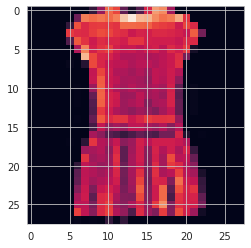

In [20]:
plt.imshow(X_train[3])

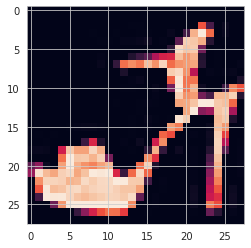

In [15]:
plt.imshow(X_train[9])

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_train[9]

5

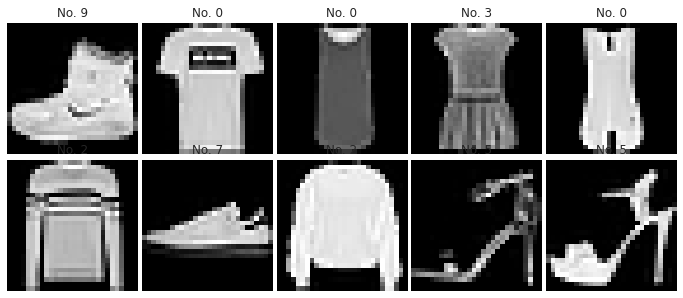

In [18]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [21]:
X_train[9].min()

0

In [24]:
X_train[9].max()

255

In [25]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [26]:
X_train[9].min()

0.0

In [27]:
X_train[9].max()

1.0

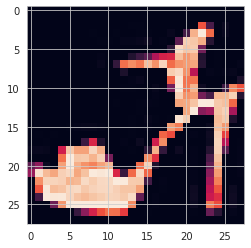

In [28]:
plt.imshow(X_train[9])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [29]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [30]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [31]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [32]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [33]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [34]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [35]:
from tensorflow.keras.utils import to_categorical

In [36]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [37]:
y_train[9]

5

In [38]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [40]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 

model.add(MaxPool2D(pool_size=(2, 2))) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [43]:
((3 * 3 * 1) + 1) * 32

320

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [54]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1252 - accuracy: 0.9538 - val_loss: 0.2671 - val_accuracy: 0.9170
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1065 - accuracy: 0.9615 - val_loss: 0.2793 - val_accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0920 - accuracy: 0.9665 - val_loss: 0.2893 - val_accuracy: 0.9156


In [55]:
model.metrics_names

['loss', 'accuracy']

**TASK 7: Plot values of metrics you used in your model.**

In [56]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.125,0.954,0.267,0.917
1,0.106,0.962,0.279,0.915
2,0.092,0.967,0.289,0.916


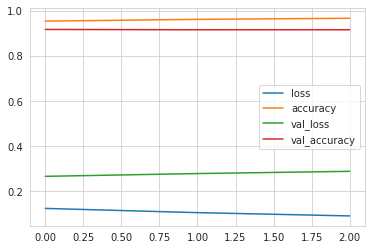

In [57]:
summary.plot();

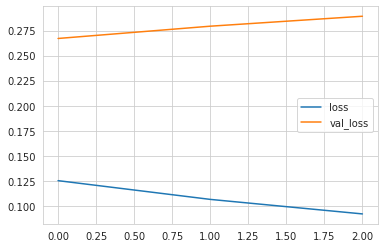

In [58]:
summary[["loss", "val_loss"]].plot();

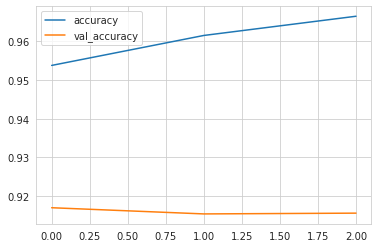

In [59]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2671 - accuracy: 0.9170


[0.26708993315696716, 0.9169999957084656]

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26708993315696716
Test accuracy: 0.9169999957084656


In [63]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.3581709e-07, 1.3040657e-12, 1.3390692e-07, ..., 2.7647970e-04,
        4.3462232e-06, 9.9971539e-01],
       [1.6755340e-06, 1.3445647e-14, 9.9999785e-01, ..., 3.0139133e-14,
        1.3166223e-12, 1.0641759e-14],
       [1.7688206e-14, 1.0000000e+00, 4.9268335e-14, ..., 8.8672676e-20,
        1.2896277e-13, 1.1992448e-19],
       ...,
       [2.8474298e-10, 2.9714942e-14, 5.8063304e-10, ..., 8.0418339e-10,
        9.9999881e-01, 2.9861971e-11],
       [8.2664335e-12, 1.0000000e+00, 2.9384375e-13, ..., 3.5808389e-14,
        4.0671549e-13, 5.5126854e-12],
       [5.8755901e-05, 4.0882963e-08, 5.5407971e-05, ..., 6.2836795e-03,
        1.4181092e-02, 4.0013803e-04]], dtype=float32)

In [64]:
pred_prob.shape

(10000, 10)

In [65]:
pred_prob[0]

array([1.3581709e-07, 1.3040657e-12, 1.3390692e-07, 2.1100115e-09,
       7.8544904e-09, 3.5478354e-06, 4.5970321e-08, 2.7647970e-04,
       4.3462232e-06, 9.9971539e-01], dtype=float32)

In [66]:
np.argmax(pred_prob[0])

9

In [67]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [68]:
y_pred.shape

(10000,)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       0.98      0.99      0.98      1000
           2       0.86      0.88      0.87      1000
           3       0.95      0.89      0.92      1000
           4       0.84      0.90      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.79      0.77      0.78      1000
           7       0.96      0.96      0.96      1000
           8       0.96      0.99      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [70]:
print(confusion_matrix(y_test, y_pred))

[[852   2  20   8   5   1 102   0  10   0]
 [  0 989   2   4   2   0   1   0   2   0]
 [ 10   1 878   5  53   0  49   0   4   0]
 [ 15  16  12 887  37   0  27   0   6   0]
 [  1   1  54  15 896   0  29   0   4   0]
 [  0   0   0   0   0 989   0   7   1   3]
 [ 71   3  55  17  68   0 771   0  15   0]
 [  0   0   0   0   0  14   0 964   3  19]
 [  3   1   2   2   1   1   1   1 988   0]
 [  1   0   0   0   0   8   0  34   1 956]]


In [71]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [72]:
(y_test != y_pred).sum()

830

## Prediction

In [73]:
my_number = X_test[3]

In [74]:
my_number.shape

(28, 28, 1)

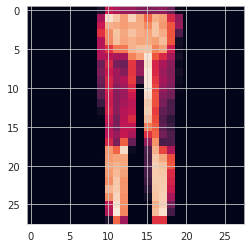

In [75]:
plt.imshow(my_number.reshape(28,28));

In [76]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[1.1473803e-12, 1.0000000e+00, 6.9856474e-14, 2.3510686e-11,
        2.7896491e-10, 9.3255820e-15, 8.0973482e-13, 9.5369356e-16,
        5.6506794e-14, 4.6657158e-15]], dtype=float32)

In [77]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [78]:
model.save("cnn-1.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___